In [59]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

**Load the dataset**

In [60]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [61]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


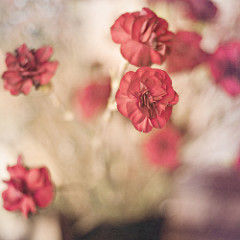

In [62]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

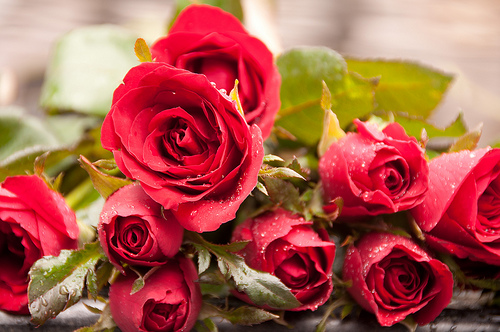

In [63]:
PIL.Image.open(str(roses[1]))

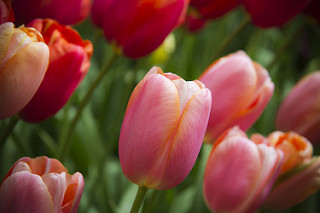

In [64]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [65]:
batch_size = 32
img_height = 180
img_width = 180

In [66]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [67]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [68]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


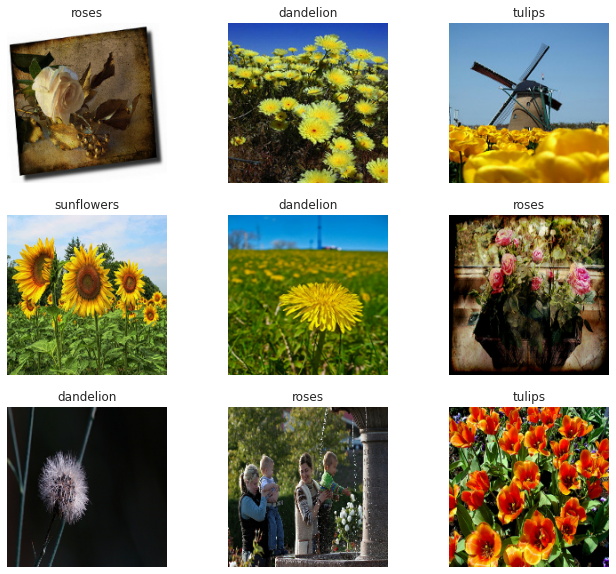

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [70]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


**Image Augmentation**

In [71]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

**Create the model and add layers**

In [76]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

**Compile the model**

In [77]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

**Fit the model**

In [79]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 111s 1s/step - loss: 1.3465 - accuracy: 0.4315 - val_loss: 1.1267 - val_accuracy: 0.5572
Epoch 2/10
92/92 [==============================] - 105s 1s/step - loss: 0.9983 - accuracy: 0.6117 - val_loss: 0.9337 - val_accuracy: 0.6471
Epoch 3/10
92/92 [==============================] - 104s 1s/step - loss: 0.8423 - accuracy: 0.6809 - val_loss: 0.8856 - val_accuracy: 0.6662
Epoch 4/10
92/92 [==============================] - 105s 1s/step - loss: 0.6149 - accuracy: 0.7708 - val_loss: 0.9221 - val_accuracy: 0.6553
Epoch 5/10
92/92 [==============================] - 105s 1s/step - loss: 0.4432 - accuracy: 0.8396 - val_loss: 0.9749 - val_accuracy: 0.6635
Epoch 6/10
92/92 [==============================] - 104s 1s/step - loss: 0.2889 - accuracy: 0.8965 - val_loss: 1.1290 - val_accuracy: 0.6608
Epoch 7/10
92/92 [==============================] - 106s 1s/step - loss: 0.1518 - accuracy: 0.9516 - val_loss: 1.3054 - val_accuracy: 0.6608
Epoch 8/10
92

**Save the model**

In [84]:
model.save("flowers.h5")